## Import Library

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

## Import dataset

In [23]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
imu_df1 = pd.read_csv(dataset_path + "imu_data.csv")
imu_df2 = pd.read_csv(dataset_path + "imu_data_v2.csv")
imu_df1 = imu_df1.iloc[:,1:]
imu_df2 = imu_df2.iloc[:,1:]
imu_df2 = imu_df2.drop(columns = (imu_df2.iloc[:,12:16]).columns , axis= 1)
imu_df1.columns = imu_df1.columns.str.replace("'" , "")
imu_df2.columns = imu_df2.columns.str.replace("'" , "")

imu_df = pd.concat([imu_df1, imu_df2] , axis= 0)

In [ ]:
imu_df.columns

Index(['attitude.roll', ' attitude.pitch', ' attitude.yaw', ' gravity.x', ' gravity.y', ' gravity.z', ' rotationRate.x', ' rotationRate.y', ' rotationRate.z', ' userAcceleration.x', ' userAcceleration.y', ' userAcceleration.z', 'Target'], dtype='object')

# Feature Selection

Activity Mapper:

0 : walking
1 : jogging
2 : upstairs
3 : downstairs
4 : sitting
5 : standing
6 : sleeping

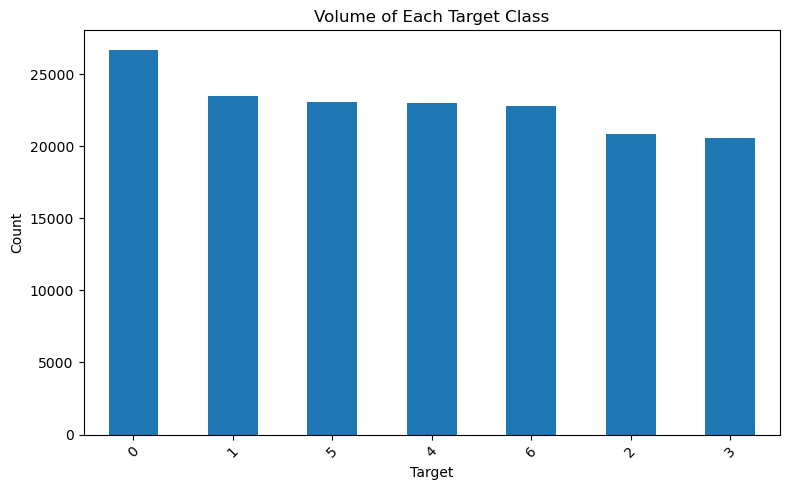

In [25]:
target_counts = imu_df['Target'].value_counts()
target_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Volume of Each Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Matrix

## IMU Data

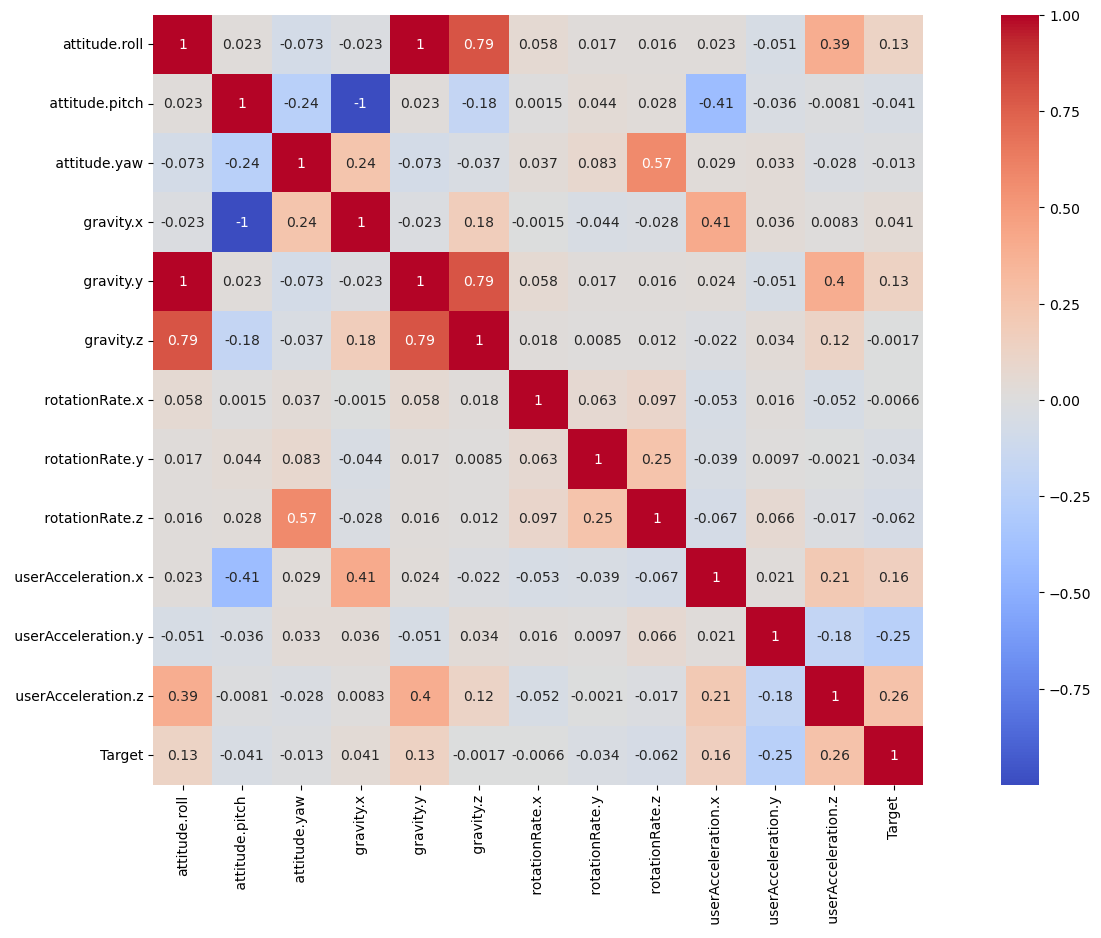

In [26]:
plt.figure(figsize = (20,10))

imu_corr = imu_df.corr()

axis_corr = sns.heatmap(imu_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [27]:
target_corr = imu_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.z    0.260098
 userAcceleration.y    0.246353
 userAcceleration.x    0.160613
 gravity.y             0.133553
attitude.roll          0.132492
 rotationRate.z        0.062477
 gravity.x             0.041199
 attitude.pitch        0.040952
 rotationRate.y        0.033800
 attitude.yaw          0.013225
 rotationRate.x        0.006593
 gravity.z             0.001693
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.x , acceleration.z]

## Motion EDA

In [28]:
"""
Map
0 - steady motion,
1 - unsteady motion
"""
mapper = {
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 0,
    5 : 0,
    6 : 0
}

In [29]:
motion_df = imu_df.copy()
motion_df['Target'] = motion_df['Target'].map(mapper)

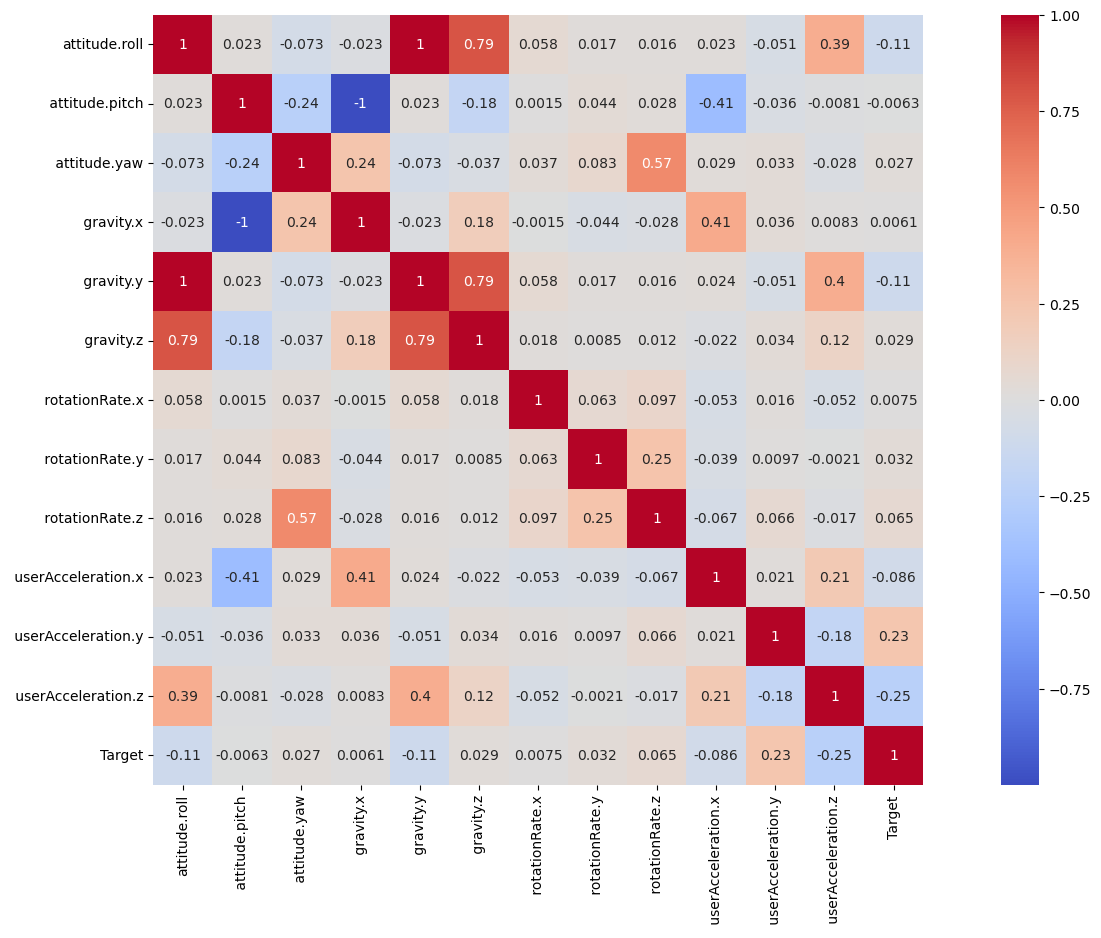

In [30]:
plt.figure(figsize = (20,10))

motion_corr = motion_df.corr()

axis_corr = sns.heatmap(motion_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [31]:
target_corr = motion_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.z    0.246707
 userAcceleration.y    0.234530
 gravity.y             0.111551
attitude.roll          0.110527
 userAcceleration.x    0.086104
 rotationRate.z        0.064742
 rotationRate.y        0.031675
 gravity.z             0.028681
 attitude.yaw          0.027110
 rotationRate.x        0.007518
 attitude.pitch        0.006286
 gravity.x             0.006074
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.z]

## Steady Motion

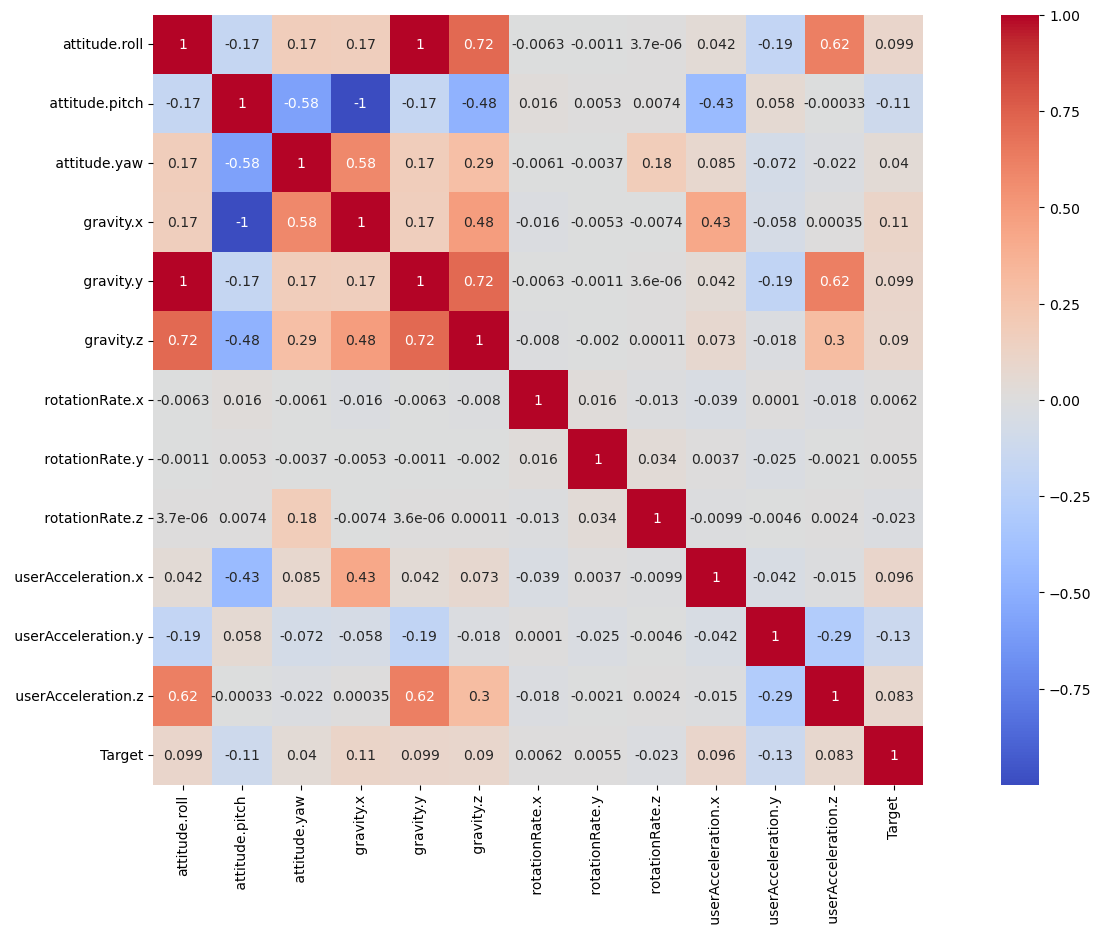

In [32]:
steady_df  =imu_df[(imu_df['Target'] == 4) | (imu_df['Target'] == 5) | (imu_df['Target'] == 6)]

plt.figure(figsize = (20,10))

steady_corr = steady_df.corr()

axis_corr = sns.heatmap(steady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [33]:
target_corr = steady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.y    0.128758
 gravity.x             0.114106
 attitude.pitch        0.113997
 gravity.y             0.099092
attitude.roll          0.098968
 userAcceleration.x    0.095573
 gravity.z             0.089898
 userAcceleration.z    0.082818
 attitude.yaw          0.040153
 rotationRate.z        0.022958
 rotationRate.x        0.006245
 rotationRate.y        0.005467
Name: Target, dtype: float64


Important Feature = [attitude.roll , attitude.pitch , gravity.x , gravity.y , gravity.z]

## Unsteady Motion

In [34]:
"""
Map
0 - surface motion,
1 - staircase motion
"""
mapper = {
    0 : 0,
    1 : 0,
    2 : 1,
    3 : 1
}

unsteady_df  = imu_df[(imu_df['Target'] != 4) & (imu_df['Target'] != 5) & (imu_df['Target'] != 6)]
unsteady_df['Target'] = unsteady_df['Target'].map(mapper)

/var/folders/4f/fqrnlkmx3jl8cj0wlvcm9rgw0000gn/T/ipykernel_20356/2288060464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsteady_df['Target'] = unsteady_df['Target'].map(mapper)


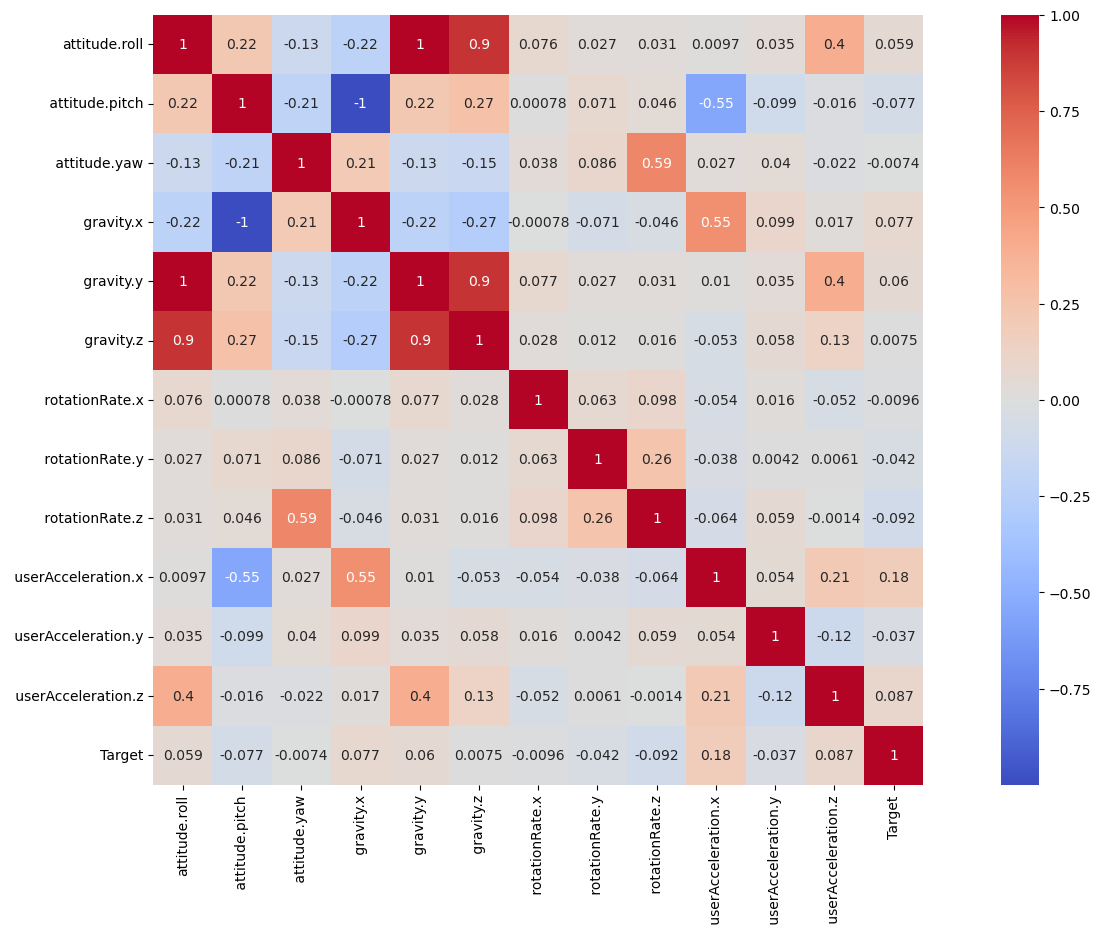

In [35]:
plt.figure(figsize = (20,10))

unsteady_corr = unsteady_df.corr()

axis_corr = sns.heatmap(unsteady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [36]:
target_corr = unsteady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.x    0.176256
 rotationRate.z        0.092341
 userAcceleration.z    0.086981
 gravity.x             0.076856
 attitude.pitch        0.076800
 gravity.y             0.059546
attitude.roll          0.058963
 rotationRate.y        0.041690
 userAcceleration.y    0.037020
 rotationRate.x        0.009624
 gravity.z             0.007517
 attitude.yaw          0.007362
Name: Target, dtype: float64


## Staircase Motion

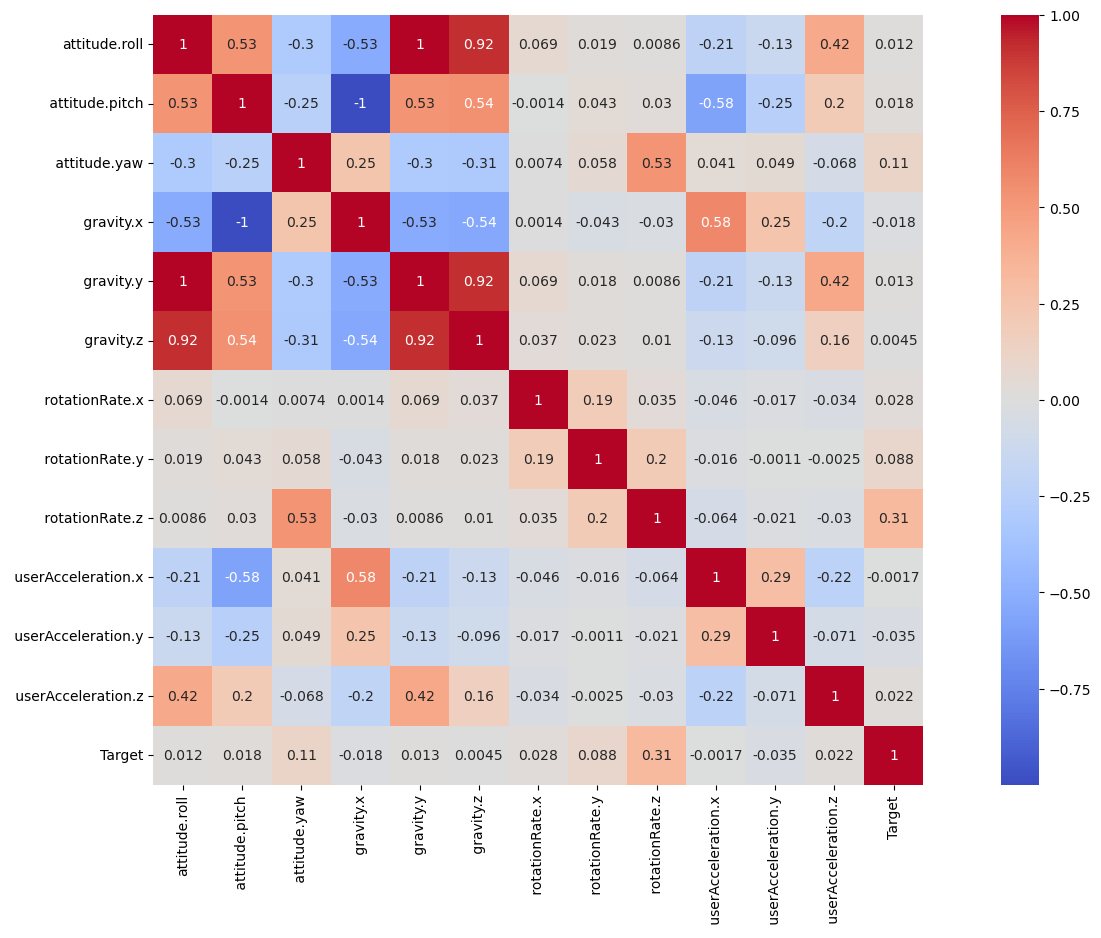

In [37]:
staircase_df  = imu_df[(imu_df['Target'] == 2) | (imu_df['Target'] == 3)]

plt.figure(figsize = (20,10))

staircase_corr = staircase_df.corr()

axis_corr = sns.heatmap(staircase_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [38]:
target_corr = staircase_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 rotationRate.z        0.312959
 attitude.yaw          0.110781
 rotationRate.y        0.088323
 userAcceleration.y    0.035050
 rotationRate.x        0.027505
 userAcceleration.z    0.021588
 attitude.pitch        0.017855
 gravity.x             0.017823
 gravity.y             0.012554
attitude.roll          0.012499
 gravity.z             0.004506
 userAcceleration.x    0.001748
Name: Target, dtype: float64


## Surface Motion

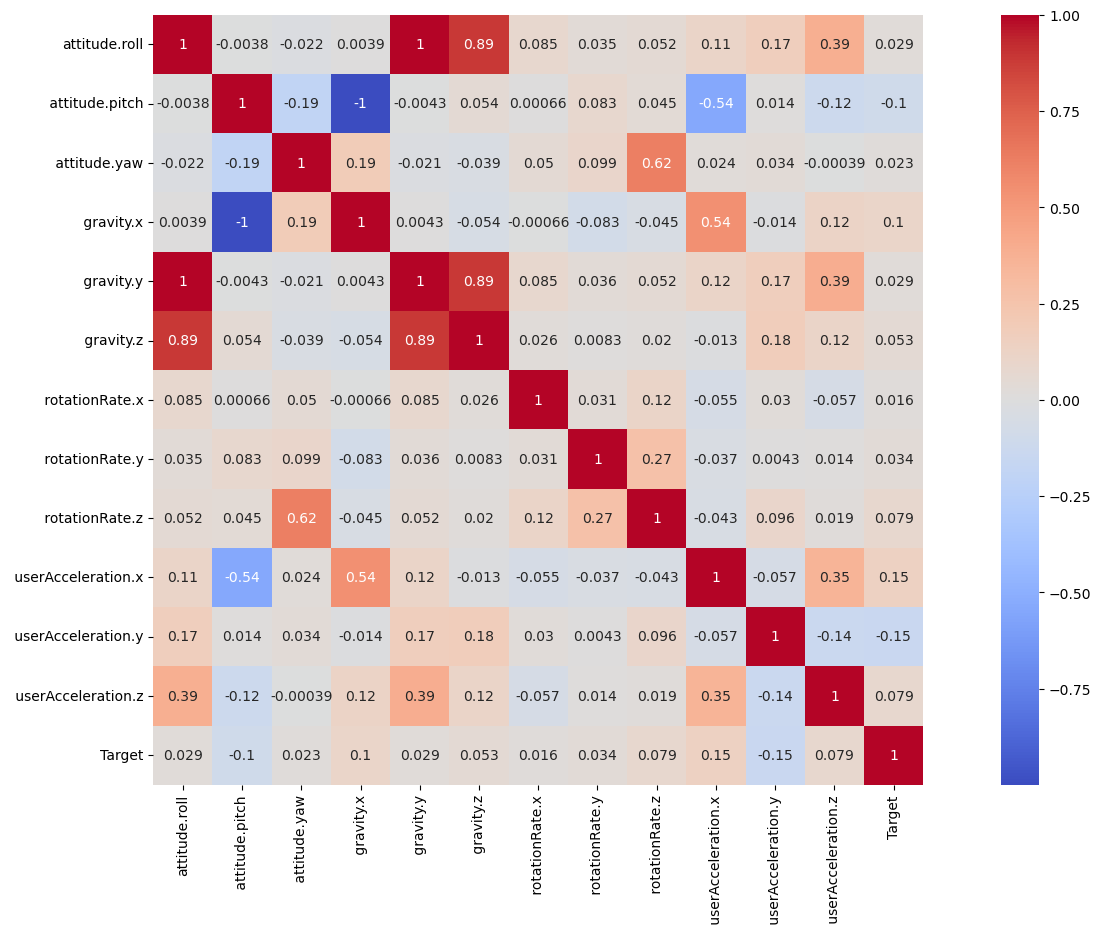

In [39]:
surface_df  = imu_df[(imu_df['Target'] == 0) | (imu_df['Target'] == 1)]

plt.figure(figsize = (20,10))

surface_corr = surface_df.corr()

axis_corr = sns.heatmap(surface_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [40]:
target_corr = surface_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.x    0.147380
 userAcceleration.y    0.146810
 gravity.x             0.101638
 attitude.pitch        0.101445
 userAcceleration.z    0.079118
 rotationRate.z        0.078870
 gravity.z             0.052989
 rotationRate.y        0.033825
attitude.roll          0.028885
 gravity.y             0.028629
 attitude.yaw          0.022912
 rotationRate.x        0.015861
Name: Target, dtype: float64
